<a href="https://www.kaggle.com/code/viniciusnalasantos/k-means-clustering?scriptVersionId=126948067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clustering: Extracting Patterns From Data & Concept + Feature Scaling + PCA [Pt.1]
### Customers segmentation based on their credit card usage behavior

![credit_cards.png](https://miro.medium.com/v2/resize:fit:828/0*S9zDFD_KE5yEiiaY)

This is the first article of a series in which I will outline an end-to-end clustering project. We will begin with some initial concepts, going to dataset exploratory analysis, passing through data preprocessing, grouping customers into clusters, and at the end, we will perform an analysis of the clusters, plus marketing suggestions.

 It's lots of things to do, so let's start!

 ### Table of Contents

[Part One](#part_one)
* [Clustering Definition](#clustering_definition)
* [Supervisionized Learning x Unsupervisionized Learning](#supervised_unsupervised)
* [K-Means Clustering](#concept)
* [Dataset Dictionary](#data_dictionary)
* [Project Aim](#project_aim)
* [EDA (Exploratory Data Analysis)](#eda)
* [Feature Scaling](#feature_scaling)
* [PCA (Principal Component Analysis)](#pca)
* [Cluster Visualization with Plotly](#visualization)
* [Conclusion](#conclu)

[Part Two](#part_two)
* [Introduction](#Introduction)
* [Metrics](#metrics)
     - [Silhouette](#sil)
     - [Davies Bouldin](#db)
     - [Calinski Harabasz](#ch)
* [Find the Ideal K Number of Clusters](#ideal_k)
     - [Elbow Method](#elbow)
     - [Alternative Methods](#alternative)
* [Cluster Significance](#significance)
* [Conclusion](#conclusion)

[Part Three](#part_three)
* [Introduction](#introduction2)
* [Graph Analysis](#graph_analysis)
* [Descriptive Measures Analysis](#descriptive_analysis)
* [Variables Selection](#variables_selection)
* [Cluster Interpretation](#cluster_interpretation)
     - [Balance](#balance)
     - [Purchases](#purchases)
     - [Cash Advance](#cash_advance)
     - [Credit Limit](#credit_limit)
     - [Payments](#payments)
     - [Minimum Payments](#minimum_payments)
* [Cluster Profiling](#cluster_profiling)
* [Marketing Strategies Suggestions](#marketing_suggestions)
     - [Cluster 0](#cluster_0)
     - [Cluster 1](#cluster_1)
     - [Cluster 2](#cluster_2)
     - [Cluster 3](#cluster_3)
     - [Cluster 4](#cluster_4)
* [End](#end)

<a id="part_one"></a>
<h2><b> Part One </b></h2>

---

#### Code from the article: [Clustering: Extracting Patterns From Data & Concept + Feature Scaling + PCA [Pt.1]](https://medium.com/@viniciusnala/clustering-extracting-patterns-from-data-concept-feature-scaling-pca-pt-1-4f33c6d39a71)

<a id="clustering_definition"></a>
## Clustering Definition

Clustering or data grouping analysis is a set of data mining techniques that aims to make an automatic grouping of the data according to their degree of similarity. The criterion of similarity depends on the problem and algorithm. The result of this process is the division of a data set into a certain amount of groups (clusters).

This is a very important definition, and all that we will do after that is related somewhat to this definition. Another very important definition is the difference between the two concepts below.

<a id="supervised_unsupervised"></a>
## Supervised Learning x Unsupervised Learning

Supervised Learning is an approach where an algorithm is trained on input data that has been labeled for a particular output. The model fits the data capturing the underlying pattern and relationship between the input data and the output labels, enabling it to predict outcomes accurately.

The two anterior data science projects that I did:

- [Machine Learning Model to Predict Survival in Titanic [Pt. 1]](https://medium.com/@viniciusnala/machine-learning-model-to-predict-survival-in-titanic-pt-1-b3681d1794fb)
- [Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]](https://medium.com/@viniciusnala/linear-regression-advanced-modeling-techniques-pipeline-pt-1-3c0433230b88)

I built a supervised machine learning model, which I used to predict a "target variable" (label).

For example, in the first project, I constructed a model to predict if a person would survive or not on Titanic. To do that I provided data containing general characteristics of each passenger and the information if this person survived or not on Titanic (target variable) - the model captured the underlying pattern and relationship between the general characteristics of the passenger and if he survived or not -, then I presented to it neve-before-seen data with general characteristics of some passengers, but without the information if the passengers survived or not, being the model responsible to guess who would survive or not.

Unlike, supervised learning, unsupervised learning uses unlabeled data, i.e. we don't provide the target variable (label) when training the model. These algorithms aren't used to predict something but to discover hidden patterns in data without the need for human intervention (hence, they are "unsupervised").

If the difference is still not so clear, along the project you will understand better. Let's continue!

<a id="concept"></a>
## K-Means Clustering

The goal of clustering is to identify meaningful groups of data. These groups can be analyzed in depth, or be passed as a feature, or as an outcome to a classification or regression model. K-Means was the first clustering method to be developed, has a very simple algorithm, and is still widely used.

![clustering.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*Cei6GQZkabRgn7J8.png)

K-Means divides the data into a K number of clusters, each cluster has a centroid. The main aim of this algorithm is to minimize the sum of the squared distances of each point to the centroid of its assigned cluster. K-Means does not ensure the clusters will have the same size but finds the clusters that are best separated.

Let's see a simple example, imagine that we have an N number of records and two variables X, and Y. Suppose we wanna split the data into K = 3 clusters, which means assigning each record (Xi, Yi) to a cluster K.

![cluster_1.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*xA_xdOKC9-GA0xcbw77fog.png)

The algorithm first selects random coordinates for the centroids, and using the euclidean distance formula measures the distance between each data point and each cluster centroid. Then each point is assigned to the closest centroid.

![distance.png](https://miro.medium.com/v2/resize:fit:600/format:webp/0*uvyEvT5qpoyv2cFX.png)

![cluster_2.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ozKTU9kb_OgbU-QFA4myLA.png)

After that, the coordinates of the centroids are re-computed by taking the mean of all data points contained in that cluster. Given an assignment of Nk records to cluster K, the center of the cluster(Xk, Yk) is calculated through the equation:

![equation_1.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZCZ97gHVIh2j1FExJzXpow.png)

In simple terms, we are just summing the Xk and Yk of the cluster and dividing by the number of points in that cluster.

After this process, the algorithm computes the sum of squares within each cluster, which is given by the formula:

![equation_2.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Te9NFMLZ9v5ZnIl_Zsp7Tg.png)

The K-Means keep repeating the process of measuring the distance between the points and the centroids, assigning each data point to the closest center, and re-computing the new coordinates of the centroids until the sum of squares across all three clusters is minimized.

![equation_3.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*odKVjftJNYpoZ9iJhudejA.png)

![cluster_3.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*t_cti7a3DasJ9BT1YpOTmg.png)

Repeat the same process many times can require a great computational cost, especially when the amount of data is large. 

If you wanna see by yourself how it works, I highly recommend this simulator: [K-Means Clustering Simulator](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/).

<a id="data_dictionary"></a>
## Dataset Dictionary

The dataset that will be used consists of the credit card usage behavior of 8950 customers during 6 months, having 18 behavioral features. The link to the dataset is available on Kaggle.

[Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

<a id="project_aim"></a>
## Project Aim

Initially, our focus will be to segment customers according to their similarities. After that, we will analyze this segmentation and define an effective credit card marketing strategy.

<a id="eda"></a>
## EDA (Exploratory Data Analysis)

Let's begin by importing the libraries and the dataset:

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

Visualizing some characteristics of the dataset:

In [26]:
df.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   40.9007             0.8182    95.4000            0.0000   
1 3202.4674             0.9091     0.0000            0.0000   
2 2495.1489             1.0000   773.1700          773.1700   
3 1666.6705             0.6364  1499.0000         1499.0000   
4  817.7143             1.0000    16.0000           16.0000   
5 1809.8288             1.0000  1333.2800            0.0000   
6  627.2608             1.0000  7091.0100         6402.6300   
7 1823.6527             1.0000   436.2000            0.0000   
8 1014.9265             1.0000   861.4900          661.4900   
9  152.2260             0.5455  1281.6000         1281.6000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 95.4000        0.0000               0.1667   
1                  0.0000     6442.9455               0.0000   
2                  0.0000        0.0000               1.0000   
3                  0.0000      205.7880               0.0833   
4                  0.0000        0.0000               0.0833   
5               1333.2800        0.0000               0.6667   
6                688.3800        0.0000               1.0000   
7                436.2000        0.0000               1.0000   
8                200.0000        0.0000               0.3333   
9                  0.0000        0.0000               0.1667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      0.0000                            0.0833   
1                      0.0000                            0.0000   
2                      1.0000                            0.0000   
3                      0.0833                            0.0000   
4                      0.0833                            0.0000   
5                      0.0000                            0.5833   
6                      1.0000                            1.0000   
7                      0.0000                            1.0000   
8                      0.0833                            0.2500   
9                      0.1667                            0.0000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  0.0000                 0              2     1000.0000   
1                  0.2500                 4              0     7000.0000   
2                  0.0000                 0             12     7500.0000   
3                  0.0833                 1              1     7500.0000   
4                  0.0000                 0              1     1200.0000   
5                  0.0000                 0              8     1800.0000   
6                  0.0000                 0             64    13500.0000   
7                  0.0000                 0             12     2300.0000   
8                  0.0000                 0              5     7000.0000   
9                  0.0000                 0              3    11000.0000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0  201.8021          139.5098            0.0000  
1 4103.0326         1072.3402            0.2222  
2  622.0667          627.2848            0.0000  
3    0.0000         1215.9515            0.0000  
4  678.3348          244.7912            0.0000  
5 1400.0578         2407.2460            0.0000  
6 6354.3143          198.0659            1.0000  
7  679.0651          532.0340            0.0000  
8  688.2786          311.9634            0.0000  
9 1164.7706          100.3023            0.0000

In [ ]:
df.shape

Through Pandas Profiling we can see a very detailed report about the general characteristics of the data set.

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df).to_notebook_iframe()

In [ ]:
# Dowload the report
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("report.html")

After analyzing the report I concluded that the features CUSTOMER_ID and TENURE are not going to contribute with the segmentation so we can exclude them from the dataset.

In [6]:
# Delete the irrelevant features
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

Now our dataset has 16 columns.

Let's see how many missing values there are in the dataset.

In [ ]:
# See Null Values
df.isnull().sum().sort_values(ascending=False)

Just a few ones, to deal with them I will use KNNImputer: each missing value will be imputed using the mean value from the n_neighbors nearest neighbors, in this case, will be the mean value of the 5 nearest neighbors.

In [7]:
from sklearn.impute import KNNImputer

# Columns with missing values
null_columns = df.columns[df.isnull().any()].tolist()

# Fill Null values
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

This way, instead of filling all the values with the mean or the median, which is considered a simple approach, we reduce the risk of biasing the clustering results.

In [ ]:
# Distribution Visualization
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

Almost every variable is very right-skewed or very left-skewed, this indicates that maybe there are some outliers, which is not something very surprising since we are working with credit card. Certainly, there will be a small portion of people that have a very high amount of money and credit limit, while the majority portion of people has more or less the same amount of money and credit limit.

<a id="feature_scaling"></a>
## Feature Scaling

(photo)

If you see the frequency columns like BALANCE_FREQUENCY, and PURCHASES_FREQUENCY, they vary between an interval of 0 and 1, 0 means 0% of frequency and 1 means 100% frequency. Comparing them with the columns BALANCE and PURCHASES, you will see that they don't have a limit to their variation, we only know that their minimum can be 0.

However, if you put these columns in the way they're right now in the cluster, it will not yield a high-quality cluster because the cluster will understand that 1.00 dollar difference in BALANCE is as significant as 1.00 percent difference in BALANCE_FREQUENCY.
 
In virtue of that, we need to put all the columns into the same scale, otherwise, will be the same thing as clustering people on their weights in kilograms and heights in meters, is a 1kg difference as significant as a 1m difference in height?
 
This is why scaling the dataset is a vital part when using clustering techniques. Therefore, we will use Normalizer to scale the dataset, but there are many ways to scale a dataset, and each one is used for a specific situation.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')

Normalizer, unlike the other methods, works on the rows, not the columns. This seems very unintuitive, but it means that will scale each value according to its line, and not according to the values in its column.

By default, L2 normalization is applied to each observation so the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1. Moreover, Normalizer transforms all the features into values between -1 and 1.

<a id="pca"></a>
## PCA (Principal Component Analysis)

In [ ]:
# Reduce dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1234)

PCA is a method used in unsupervised machine learning (such as clustering) that reduces high-dimension data to smaller dimensions while preserving as much information as possible. Using PCA before applying clustering algorithm reduces dimensions, data noise, and decreases computation cost.

In this article, the number of features will be reduced to 2 dimensions so that the clustering results can be visualized.


                                                                        ...
To organize better these two preprocessing steps we will embed them into a unique step with Pipeline:

In [ ]:
# Preprocessing
from sklearn.pipeline import Pipeline

# Pipeline
pipe_normalizedscaled_pca = Pipeline([('scaling', scaler), ('pca', pca)])

The dataset will be in this way after the preprocessing:

In [ ]:
# Transformed dataset
pd.DataFrame(
    pipe_normalizedscaled_pca.fit_transform(df),
    columns=['x', 'y']
)

<a id="visualization"></a>
## Cluster Visualization with Plotly

Once done the preprocessing, the only thing that remains is the modeling and visualization. And to do this I will create a function, so we can use it whenever we want.

In [ ]:
# Libs
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns

# Function
def Visualize_Cluster(df, pipeline, n_clusters):
    '''
    Display a scatter plot cluster after transforming the data and using it to fit KMeans Cluster 
    
        Parameters:
                df (pandas.core.frame.DataFrame): Dataframe that will be used in the Pipeline and train the KMeans Cluster
                pipeline (sklearn.pipeline.Pipeline): Transform the Dataframe
                n_clusters (int): Number of clusters that the KMeans Cluster will have
        
        Returns:
                None    
    '''
    
    data = pd.DataFrame(pipeline.fit_transform(df), columns=['x', 'y'])
    
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, verbose=False, random_state=1234)
    clusters = pd.DataFrame(kmeans.fit_predict(data), columns=['Cluster']) 
    
    clusters_data = pd.concat([data, clusters], axis=1)
    
    fig = px.scatter(clusters_data, x='x', y='y', color='Cluster')
    fig.show()

First, we import the KMeans library for the clustering and the Plotly library for the cluster visualization. Then we write the function that has as parameters: the dataset for training the KMeans model, the pipeline for preprocessing, and the number of clusters in KMeans.

Internally, the function will transform the dataset according to the steps in the Pipeline, assuming that this transformation will only return two columns, which will be named "x", and "y". Create the KMeans Cluster, and inside this object, it will be passed the number of clusters previously specified in the parameters of the function as an argument, so we can visualize how many clusters we want. And in the end, we will plot the scatter graph of the clustering, each color will be a cluster.

Now, let's visualize our clustering with 5 clusters.

In [ ]:
Visualize_Cluster(df, pipe_normalizedscaled_pca, n_clusters=5)

Remember: almost all attributes of the KMeans model in the function are with the default values, the only attribute that we can change is the number of clusters of the clustering. Therefore, we can make the clustering even better by changing the parameters of the KMeans model.

Let's see how would be our clustering with 10 clusters.

In [ ]:
Visualize_Cluster(df, pipe_normalizedscaled_pca, n_clusters=10)

<a id="conclu"></a>
## Conclusion

In this first part, we started the project learning some concepts and understanding how clustering works. In part two of the series, we will give continuity to the project by learning the most common metrics used to validate a cluster and how to use these metrics to find the ideal number of clusters for this dataset.

In virtue of the content being about metrics, we will have to enter into math equations, so I will explain many things in mathematical terms (what people usually dislike, but the subject being studied requires that be this way), and I will assume that you have at least a basic algebra knowledge.

<a id="part_two"></a>
<h2><b> Part Two </b></h2>

---

#### Code from the article: [Clustering: Extracting Patterns From Data & Metrics + Cluster Validation [Pt.2]](https://medium.com/@viniciusnala/clustering-extracting-patterns-from-data-metrics-cluster-validation-pt-2-dd2ce0a3405d)

# Clustering: Extracting Patterns From Data & Metrics + Cluster Validation [Pt.2]
### Customers segmentation based on their credit card usage behavior

![metric.png](https://cdn-images-1.medium.com/max/1100/0*56TuU0xuAgVwrqOB.png)

In part one, we learned some concepts and understood what we are going to do in the project. In part two, as I said, we will start discussing about metrics and cluster validation.

<a id="introduction"></a>
## Introduction

Before continuing the project, we need to know how to answer questions like: does the cluster represent well the dataset? Which is the ideal K number of clusters? How to know if the data is valid to be clustered? Without knowing how to answer these questions, every work will be in vain.

In virtue of that, some metrics are used to evaluate a clustering algorithm, through these metrics we can measure the similarity inside a cluster and its separation from the other clusters. Learning how to analyze these metrics is the key aim of this article.

<a id="metrics"></a>
## Metrics

<a id="sil"></a>
### Silhouette

![sil.png](https://cdn-images-1.medium.com/max/1100/0*NypMcCBaiqkvfjD3.png)

The first metric that I wanna show is the most commonly used, and it's very simple to interpret it. The silhouette value measures how similar an object is to its cluster (compression) compared to other clusters (separation). To understand this equation, I will define what each variable means.

First, I would like to explain **A**, which is the mean distance between the point and all the other points of the same cluster; measures the compression of the clusters; the smaller the value, the more compressed the clusters.

![sil2.png](https://cdn-images-1.medium.com/max/1100/0*3WaD3IJDPLsmD6xf)

Let i be a data point in the cluster **CI**; **CI** be the number of points belonging to cluster **i**; and **d(i,j)** be the distance between the points **i** and **j** in the cluster **CI**. First, we sum the distance of the points and all the other points of the same cluster, then we divide by the number of data points in that cluster (we write **CI - 1** because we do not include the distance **d(i,i)** in the sum).

Now, I will explain **B**, which is the mean distance between the point and all the other points of the closest cluster; measures the separation of the clusters; the bigger the value, the more separated the clusters.

![sil.png](https://cdn-images-1.medium.com/max/1100/0*JPgpv39P2lFz758j)

Let **CJ** be the nearest neighbor of the point **i** in cluster **CI** (hence the min operator in the formula). First, we sum the distance of the points and all the other points of the closest cluster, then we divide by the number of data points in that cluster.

We now can define a silhouette value of one datapoint **i**:

![sil.png](https://cdn-images-1.medium.com/max/1100/0*U2r0LdfvnCHllm-T)

The silhouette ranges from −1 to +1, where 1 means the clusters are well apart from each other and clearly distinguished; 0 means the clusters are indifferent, or we can say that the distance between clusters is not significant; -1 generally indicates that there are data points of a cluster inside a different cluster, it's the worst result that we can have.

The logic behind the **max(a, b)** is that if the clusters are well apart of each other and clearly distinguished, the a will be very small and b will be bigger, which means that **b-a** will return a number close to **b**, and **b** will be selected to divide in **max(a, b)**. Therefore dividing a number close to **b** by **b**, will result in a number close to 1.

<a id="db"></a>
### Davies Bouldin

![db.png](https://cdn-images-1.medium.com/max/1100/1*_njPDY_X1qcyJhIzvpWrIA.png)

To understand the Davies Bouldin metric, we need first to understand what **Ri,j** means, which is given by the equation:

![db.png](https://cdn-images-1.medium.com/max/1100/0*_wXs9tiTUVe5SyiO)

Where the **Si** is the mean distance between every point in cluster **Ci** to the centroid of cluster **Ci**, it measures the compression of the clusters, so we wanna this variable to be near 0.

**Di,j** is the distance between the centroids of the clusters **Ci** and **Cj**, it measures the separation of the clusters, so we wanna this variable as large as possible.

Remember that **i** need to be different from **j**, otherwise, if they are equal, the distance **Di,j** will be 0. The equation above gives the similarity between the cluster **Ci** and **Cj**, being minimized as the clusters are more distant and more compacted, that is, the closer to 0 the **Ri,j**, the more similar the clusters are.

The final equation for Davies Bouldin is given by the equation:

![db.png](https://cdn-images-1.medium.com/max/1100/0*dM1ocPwuDW6ZLXQD)

Where **K** is the number of clusters of the clustering.

The logic behind the **max(Ri,j)** is that: suppose we did a K-Means clustering with 5 clusters, and we calculated the **Ri,j** between all the 5 clusters and stored all the 10 values in a list (10 because we calculated the **Ri,j** of cluster 1 and 2, 1 and 3, 1 and 4, 1 and 5, 2 and 3… for all the clusters). Once our objective is for the **Ri,j** of the clusters to be as close to 0 as possible, we will only select the **Ri,j** of clusters 1, 2, 3, 4, and 5 that are the biggest, because if the mean of the worst results is considerably good, we can suppose that the clustering, in general, is very good.
 
Therefore, we wanna the **DB** as close to 0 as possible.

<a id="ch"></a>
### Calinski Harabasz

![ch.png](https://cdn-images-1.medium.com/max/1100/0*XMPOy2qlfkWNo4hE)

Only by looking at this equation, I can already imagine people thinking of skipping this metric, however, this metric is very simple to be comprehended, we just need to go by parts.

![ch.png](https://cdn-images-1.medium.com/max/1100/1*BY-MFR45eI6xD71SnHQ3Nw.png)

Let's start with the right part of the equation. **N** is the number of elements of each cluster multiplied by the number of clusters and **K** is the number of clusters.

Now we can go to the **SSw**:

![ch.png](https://cdn-images-1.medium.com/max/1100/0*bgLHieo7NY882JJB)

Which refers to the *overall within-cluster variance*, and is given by the sum of the squared distances of each data point **X** to the centroid of the cluster **Mi** to which it belongs. Measures the dispersion within cluster, so we wanna this value to be as close to 0 as possible.

![ch.png](https://cdn-images-1.medium.com/max/1100/0*J5DQASo2DUpfLkoN)

Another required calculation is the *overall between-cluster variance*, which is given by the difference between the sum of the squared distances of each data point **X** to the data set centroid and the **SSw**. To find the data set centroid, or data set center, we have to take the X and Y coordinates of all the data points and divide them by the number of data points. The **SSb** measures the dispersion between clusters, so we wanna this value as large as possible.

Ultimately, this is the equation for the Calinski-Harabasz value:

![ch.png](https://cdn-images-1.medium.com/max/1100/0*5w4AeumFZUvc7Jed)

Once **N** and **K** are constants, if **SSb** is bigger and **SSw** smaller, which is the objective, the result will be large. Unlike the other metrics, the higher the value, the better the clustering, very small values mean not high-quality clusters according to this metric.

Now that we learned about the three most common metrics, let's see how we apply them in practice.

<a id="ideal_k"></a>
## Find the Ideal K Number of Clusters

A K-Means algorithm requires that you specify the K number of clusters. Sometimes the number of clusters can be intuitive, or driven by the application. For instance, a company might want to cluster its customers according to "personas", so in this case, managerial considerations would dictate the number of desired customer segments. Two maybe not yield a good differentiation of the customers, while nine might be too many to manage.

In absence of a K number of clusters, a statistical approach could be used. There are many methods to find the ideal number, a common approach is called *elbow method*.


<a id="elbow"></a>
### Elbow Method

![elbow.png](https://cdn-images-1.medium.com/max/1100/0*O_gfqwexREu7ntfY.jpeg)

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

When I say explained variation I am referring to the WCSS (Within-Cluster Sum of Square), which can be calculated with the sum of the square distances between points in a cluster and the cluster centroid. We can get this information from the property *inertia_*.
 
Let's see this graph of our dataset, from the range of 2 to 30 K number of clusters:

In [ ]:
inertia = []

# Append the WCSS values for 2 to 30 K number of clusters
for n_clusters in range(2,31):
    kmean = KMeans(n_clusters=n_clusters, random_state=1234).fit(df)
    inertia.append(kmean.inertia_)

inertias = pd.DataFrame({'n_clusters': range(2,31), 'inertia': inertia})


# Graph
ax = inertias.plot('n_clusters', 'inertia', marker='o', linestyle='--', linewidth=2, markersize=5)

plt.xlabel('Number of Clusters(K)')
plt.ylabel('Avarage Within-Cluster Squared Distances')
plt.grid()

plt.show()

As the majority of the real-world datasets don't have a clear elbow point, we have to rely on other methods for our analysis. However, not having a well-defined elbow point, does reveal the nature of the data of not having well-defined clusters.

We can even use libraries that automatically select the optimal elbow point for you, although the point is not so clear:

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=1234)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

According to the library, the "best" K number is 5.

<a id="alternative"></a>
### Alternative Methods

As we learned the metrics earlier, we can use them to identify the ideal K number of clusters. To do that I will first generate the values of the silhouette, davies bouldin, and calinski harabasz for 2 to 30 K number of clusters.

In [ ]:
# Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Pipeline
pipe_normalizer = Pipeline([('normalization', Normalizer())])

# Transformed data
data = pipe_normalizer.fit_transform(df)
data = pd.DataFrame(data, columns=df.columns)

# Function
def return_metrics(n_clusters, dataset):
    """
    Return the silhouette, davies bouldin, and calinski harabasz scores
    
        Paremeters:
            n_clusters (int): number of clusters of KMeans
            dataset (pandas.core.frame.DataFrame): dataframe of the clustering
        
        Returns:
            si (float): silhouette score
            db (float): davies bouldin score
            ch (float): calinski harabasz score
    """
    kmean = KMeans(n_clusters=n_clusters, random_state=1234)
    labels = kmean.fit_predict(dataset)
    
    si = silhouette_score(dataset, labels, metric='euclidean', random_state=1234)
    db = davies_bouldin_score(dataset, labels)
    ch = calinski_harabasz_score(dataset, labels)
    
    return si, db, ch


n_clusters, si_list, db_list, ch_list = list(), list(), list(), list()

# Calculate and store the metrics for 2 to 30 K number of clusters
for i in range(2, 31):
    si, db, ch = return_metrics(i, data)
    n_clusters.append(int(i))
    si_list.append(si)
    db_list.append(db)
    ch_list.append(ch)

# Metrics Values
metrics = pd.DataFrame(np.column_stack((n_clusters, si_list, db_list, ch_list)), columns=['N° Clusters', 'silhouette', 'davies_bouldin', 'calinski_harabasz'])
metrics.head()

First of all, I will analyze the Silhouette score:

In [ ]:
# Lib
import plotly.express as px

# Silhouette
fig = px.line(metrics, x='N° Clusters', y='silhouette', title='Silhouette')
fig.show()

The objective of the Silhouette score is to be as close to 1 as possible, and the closer ones are between 5 and 6. But I'm still in doubt about what number should I choose so I will do another plot of the silhouette for 4 to 7 K number of clusters.

In [ ]:
# Lib
from yellowbrick.cluster import SilhouetteVisualizer

# Fig
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [4, 5, 6 ,7]:
    
    km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=1234)
    q, mod = divmod(i, 4)
    
    if mod>1:
        q += 1
        mod -= 2
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)


# Average Silhouette Score 
metrics[metrics['N° Clusters'].between(4, 7, inclusive=True)][['N° Clusters', 'silhouette']].reset_index(drop=True)

Each color in each graph represents a cluster, the size of the color represents the size of the cluster, and the dashed red line represents the average Silhouette score for the specified K number of clusters.

For an ideal K, all the clusters should have a Silhouette score bigger than the average Silhouette score, and for 4 to 7 K clusters, this condition is satisfied. Another thing that should be taken into consideration is the fluctuation in the size of the clusters, where I can see that clusters with 5 to 7 K clusters fluctuate more.

Before deciding on the K number, let's see what the other metrics can tell us.

In [ ]:
# Davies Bouldin
fig = px.line(metrics, x='N° Clusters', y='davies_bouldin', title='Davies Bouldin')
fig.show()

According to Davies Bouldin metric, where the objective is to be as close as possible to 0, again the K numbers 5 and 6 seem to be the best ones.

In [ ]:
# Calinski Harabasz
fig = px.line(metrics, x='N° Clusters', y='calinski_harabasz', title='Calinski Harabasz')
fig.show()

And according to Calinski Harabasz metric, where the objective is to be as large as possible, is the same.

After this analysis, I decided to choose 5 as the K number of clusters to be used in our clustering.

<a id="significance"></a>
## Cluster Significance

Now that we already decided how many clusters we want in the clustering, let's see if the clusters are valid. One way of doing it, is generating a random dataset with the same size as the credit card dataset, and then comparing the values of the metrics of this dataset to the credit card dataset.

In [ ]:
# Generating the random dataset
dataset = np.random.rand(8950, 16)

# Computing the metrics for the random dataset
si, db, ch = return_metrics(5, dataset)


# Display the results
print('Metrics of the cluster with the credit card dataset:')
display(metrics[metrics['N° Clusters'] == 5].reset_index(drop=True))

print('\n')

print('Metrics of the cluster with a random dataset:')
display(pd.DataFrame(data=[[5, si, db, ch]], columns=['N° Clusters', 'silhouette', 'davies_bouldin', 'calinsk_harabasz']))

First I generated a random dataset with the same shape as the credit card dataset, then I computed the values of the silhouette, davies bouldin, and calinski harabasz for this dataset using the function return_metrics that we created earlier.

Comparing both datasets, we see that the credit card dataset achieved a better score in all the metrics. This way, we can know if our data is significant to be clustered or not.

<a id="conclusion"></a>
## Conclusion

In the second part, we learned three standard metrics for clustering evaluation, and understood how to find the ideal K number of clusters when the Elbow Method doesn't provide a clear answer.

In the next part, we will begin by doing the analysis of the clustering, identifying the peculiarities of each cluster, and defining effective marketing suggestions. Unlike part two, the next part won't have many math equations, however, we will have to do a lot of descriptive measures interpretation and graph visualization analysis.

<a id="part_three"></a>
<h2><b> Part Three </b></h2>

---

#### Code from the article: [Clustering: Extracting Patterns from Data & Cluster Interpretation + Plotly [Pt.3]](https://medium.com/@viniciusnala/clustering-extracting-patterns-from-data-cluster-interpretation-plotly-pt-3-26ac4be4326a)

# Clustering: Extracting Patterns from Data & Cluster Interpretation + Plotly [Pt.3]

![img.png](https://cdn-images-1.medium.com/max/1100/0*3HU79Ldu9f7bN-A3.jpg)

Now that we finally arrived at the last part of the project, we will do the most interesting task: interpret the cluster and define effective marketing strategies. Who haven't seen the last two parts, I highly recommend reading, because without reading them you won't be able to know how we arrived here.

<a id="introduction2"></a>

## Introduction

In the last part, we already decided to use 5 clusters in the clustering, but before doing the clustering, let's first preprocess the data with Normalizer.

In [8]:
# Libraries
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

# Preprocessing
pipe_normalizer = Pipeline([('normalization', Normalizer())])

# Transformed data
data = pd.DataFrame(pipe_normalizer.fit_transform(df), columns=df.columns)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.039356           0.000787   0.091796          0.000000   
1     0.293876           0.000083   0.000000          0.000000   
2     0.310798           0.000125   0.096307          0.096307   
3     0.206657           0.000079   0.185867          0.185867   
4     0.504298           0.000617   0.009867          0.009867   
...        ...                ...        ...               ...   
8945  0.025197           0.000884   0.257441          0.000000   
8946  0.004937           0.000257   0.077209          0.000000   
8947  0.022773           0.000811   0.140541          0.000000   
8948  0.026526           0.001643   0.000000          0.000000   
8949  0.186406           0.000333   0.546778          0.546778   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.091796      0.000000             0.000160   
1                   0.000000      0.591240             0.000000   
2                   0.000000      0.000000             0.000125   
3                   0.000000      0.025516             0.000010   
4                   0.000000      0.000000             0.000051   
...                      ...           ...                  ...   
8945                0.257441      0.000000             0.000884   
8946                0.077209      0.000000             0.000257   
8947                0.140541      0.000000             0.000811   
8948                0.000000      0.072060             0.000000   
8949                0.000000      0.063538             0.000333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.000080   
1                       0.000000                          0.000000   
2                       0.000125                          0.000000   
3                       0.000010                          0.000000   
4                       0.000051                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.000737   
8946                    0.000000                          0.000214   
8947                    0.000000                          0.000649   
8948                    0.000000                          0.000000   
8949                    0.000333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       0.001924      0.962221   
1                   0.000023          0.000367       0.000000      0.642358   
2                   0.000000          0.000000       0.001495      0.934207   
3                   0.000010          0.000124       0.000124      0.929955   
4                   0.000000          0.000000       0.000617      0.740060   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       0.005306      0.884314   
8946                0.000000          0.000000       0.001544      0.257362   
8947                0.000000          0.000000       0.004866      0.973274   
8948                0.000329          0.003942       0.000000      0.985535   
8949                0.000167          0.001000       0.011503      0.600168   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0     0.194178          0.134239          0.000000  
1     0.376517          0.098404          0.000020  
2     0.077485          0.078135          0.000000  
3     0.000000          0.150771          0.000000  
4     0.418340          0.150967          0.000000  
...        ...               ...               ...  
8945  0.287928          0.043231          0.000442  
8946  0.070996          0.957484          0.000000  
8947  0.079099          0.080216          0.000243  
8948  0.103580          0.109898          0.000493  
8949  0.031592          0.044157    

To facilitate the preprocessing we will put it in the Pipeline object, transform the data, and assign the transformed data to the data variable. This will be the dataset that we are going to do the clustering.

In [9]:
# Lib
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, verbose=False, random_state=1234)

# Labels
labels = pd.DataFrame(kmeans.fit_predict(data), columns=['CLUSTER']) 
labels

CLUSTER
0           2
1           1
2           2
3           2
4           3
...       ...
8945        2
8946        4
8947        2
8948        2
8949        0

[8950 rows x 1 columns]

Then we will create the K-Means object for the clustering, and it will assign each record to a cluster.

In [10]:
# Assign each label to its record
clusters_data = pd.concat([df, labels], axis=1)
clusters_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  CLUSTER  
0      201.802084        139.509787          0.000000        2  
1     4103.032597       1072.340217          0.222222        1  
2      622.066742        627.284787          0.000000        2  
3        0.000000       1215.951453          0.000000        2  
4      678.334763        244.791237          0.000000        3  
...           ...               ...               ...      ...  
8945   325.594462         48.886365          0.500000        2  
8946   275.861322       3720.379789          0.000000        4  
8

Now that we already have the labels of each record, let's add this column to the not preprocessed dataset - so we can do the analysis -, and assign it to the clusters_data variable.

And let's see how many records each cluster has:

In [11]:
# Clusters Size
clusters_data['CLUSTER'].value_counts()

2    3241
3    2102
0    1644
1    1600
4     363
Name: CLUSTER, dtype: int64

Once everything is alright, we can start our analysis.

<a id="graph_analysis"></a>

## Graph Analysis

First of all, let's start plotting some graphs.

In [12]:
# Plotly
import plotly.express as px

# Plot
fig = px.scatter(clusters_data, x='PURCHASES', y='PAYMENTS', color='CLUSTER',
                 title='PAYMENTS x PURCHASES')
fig.show()

Extract some information here seems to be a bit difficult, since the only clusters that we can see more clearly are clusters 0 and 1. The only thing that I can extract here is that customers of Cluster 1 tend to pay more for their purchases, whereas customers of Cluster 0 tend to pay more or less the same as their purchases.

This is still not so relevant, let's see another plot if we can extract more information:

In [13]:
# CASH ADVANCE X PURCHASES
fig = px.scatter(clusters_data, x='PURCHASES', y='CASH_ADVANCE', color='CLUSTER',
                 title='CASH_ADVANCE x PURCHASES')
fig.show()

Again, the only clusters that are more visible are clusters 1 and 0, and the only thing extractable here is that customers of Cluster 1 tend to pay high quantities in advance, whereas customers of Cluster 0 tend to not pay in advance.

If we continue plotting graph per graph, it would not yield a lot of relevant information and would require a great amount of time to plot and analyze. The ideal would be to plot all the graphs at the same time, and Seaborn can do this with the method pairplot.

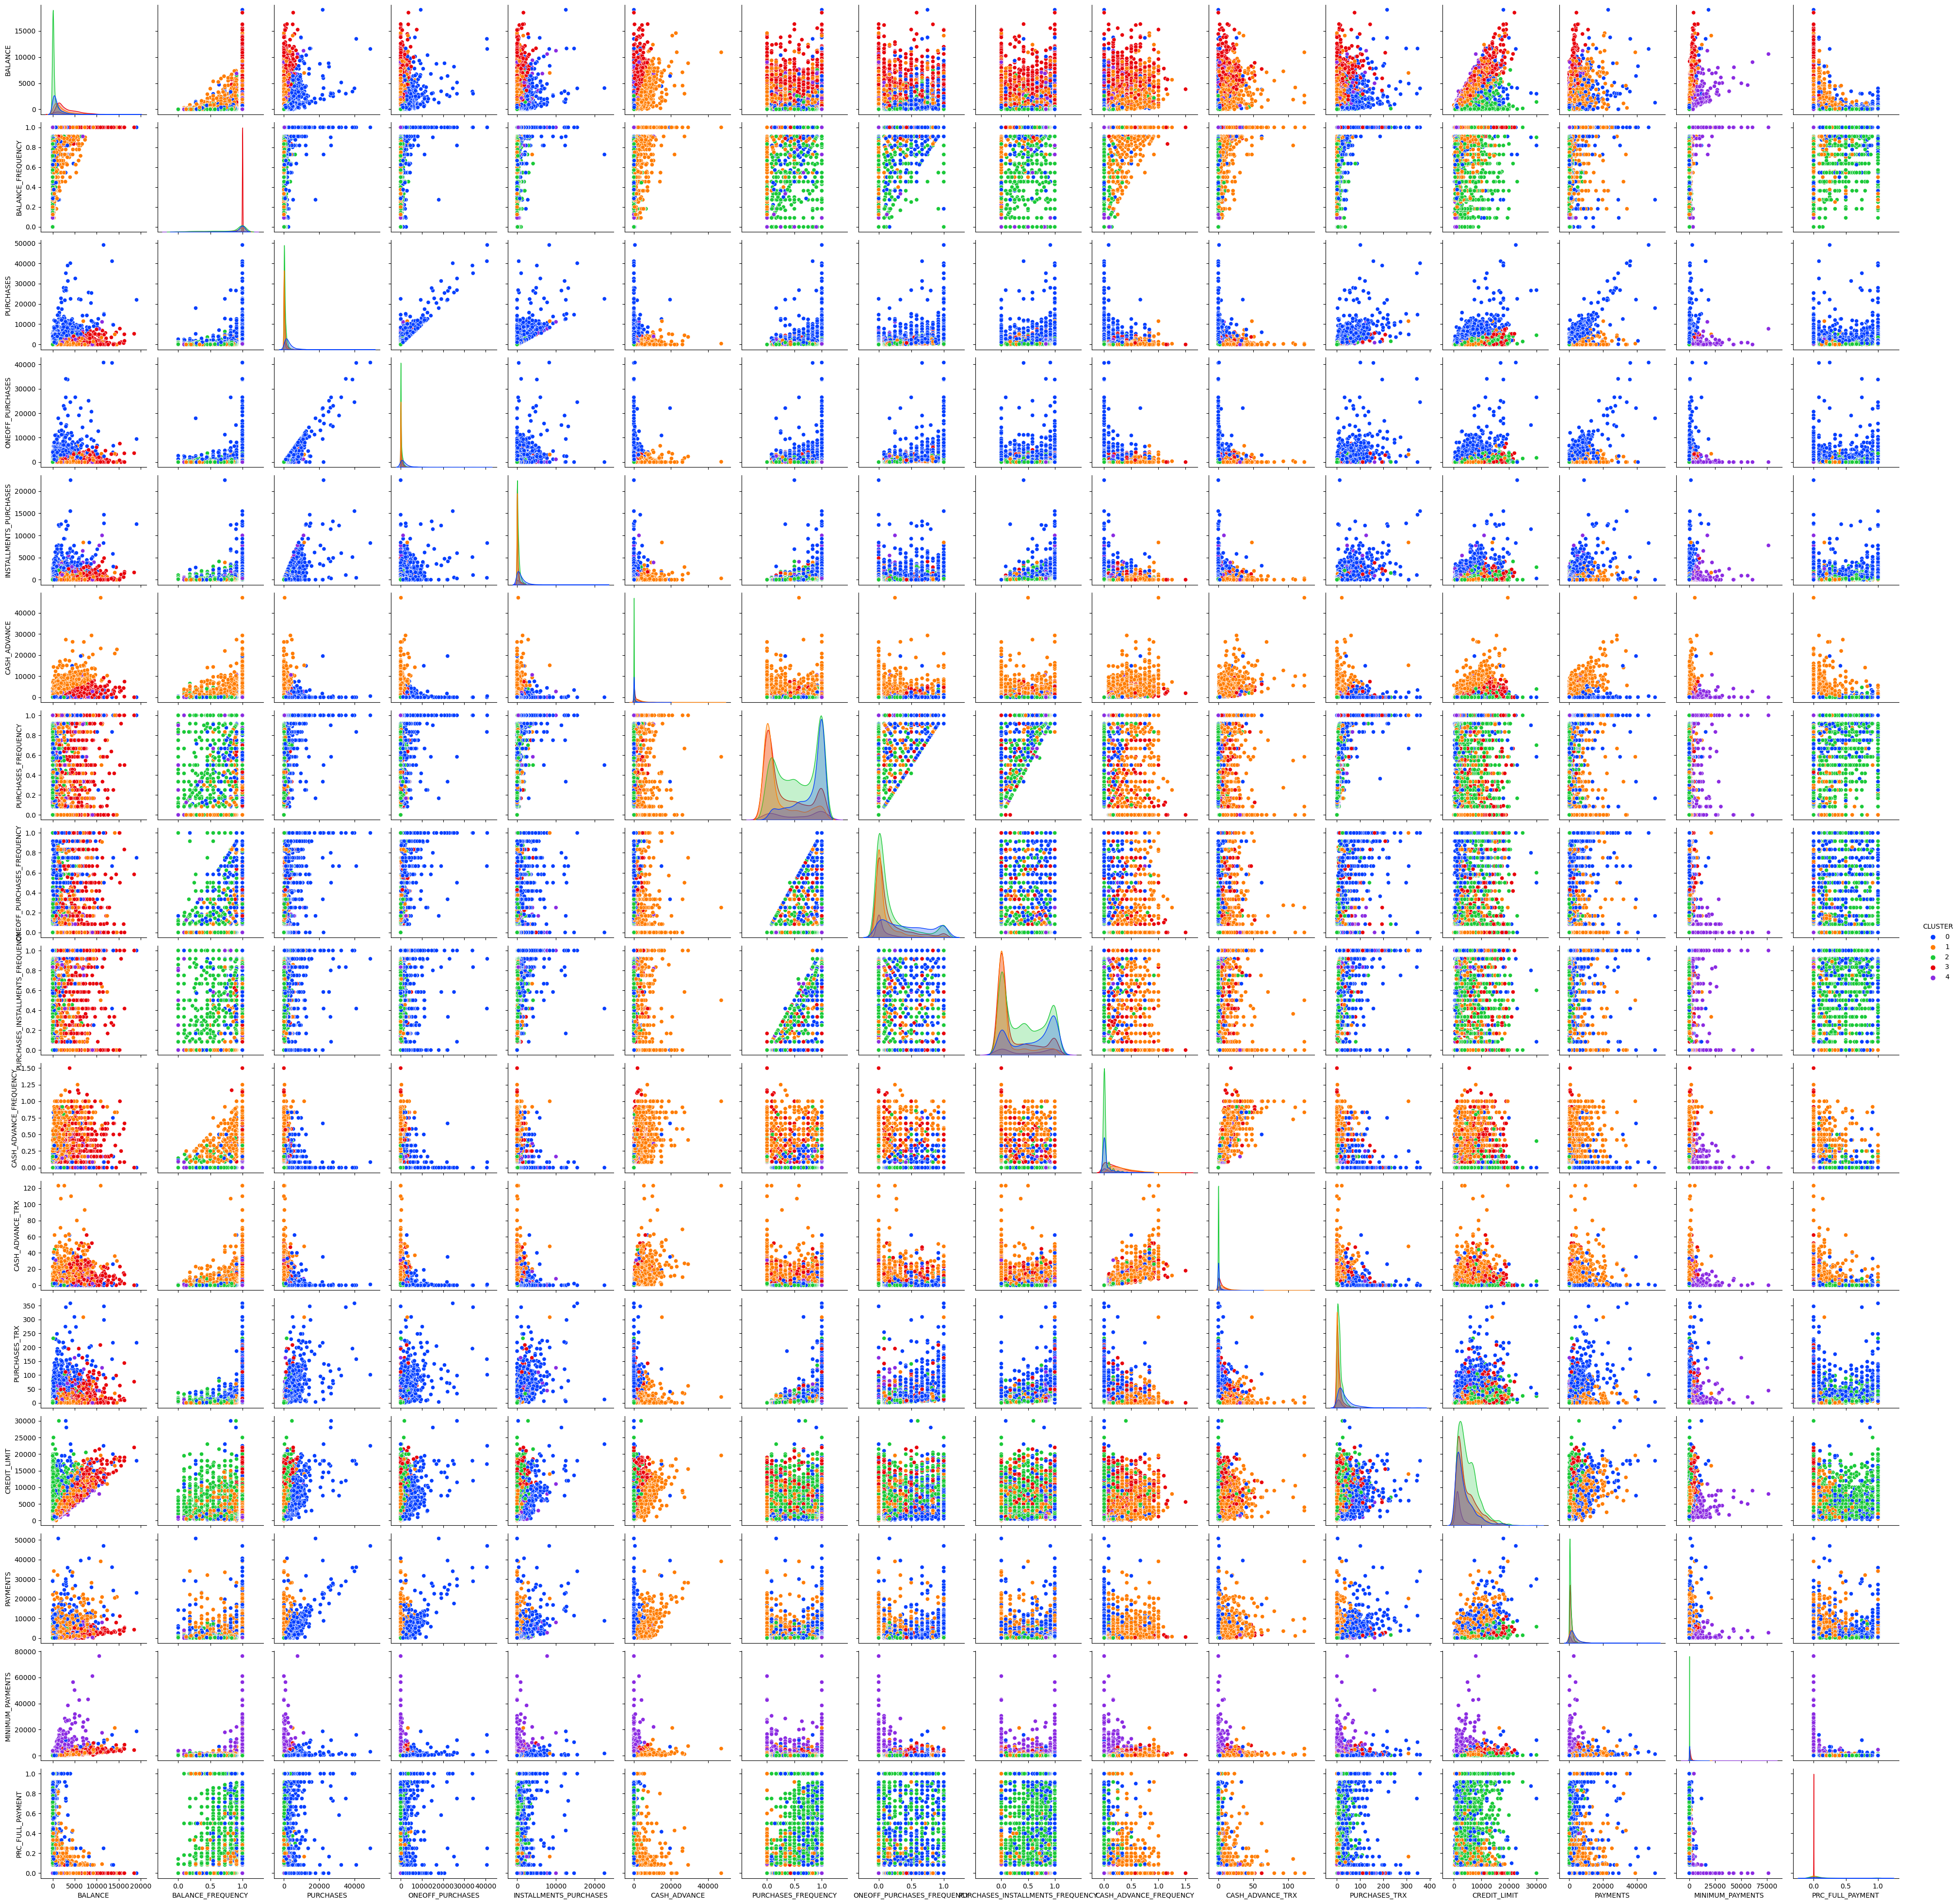

In [12]:
# Pairplot
sns.pairplot(clusters_data, hue='CLUSTER', palette='bright')

Nevertheless, the dataset has so many features that we can't even see what each graph can tell us.

Therefore, I conclude that instead of using the graph visualization approach, we will need to use a different approach.

<a id="descriptive_analysis"></a>

## Descriptive Measures Analysis

A more efficient way of analyzing the clustering is through descriptive measures visualization.

In [14]:
# BALANCE descriptive measure analysis
clusters_data[['BALANCE', 'CLUSTER']].groupby(by='CLUSTER').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
CLUSTER                                                              
0        1644.0  1126.550442  1641.768094    0.000000   211.566656   
1        1600.0  1990.480586  1955.469710    0.074724   665.445823   
2        3241.0   441.448287   814.551573    0.000000    24.680177   
3        2102.0  3284.571075  2581.157698  114.523682  1377.273528   
4         363.0  1736.445029  1790.535310    0.000000   775.039403   

                                                 
                 50%          75%           max  
CLUSTER                                          
0         556.818403  1337.243792  19043.138560  
1        1327.081747  2655.041636  14581.459140  
2          84.988845   424.968492   7533.854422  
3        2435.613264  4566.671013  18495.558550  
4        1227.548135  1988.949826  11209.370760

Using this approach we can evaluate the clustering according to the mean, median, etc. For instance, in the above photo, we can see the descriptive measures of each cluster of the Balance variable.

However, we will face the same problem that we had in the Graph Analysis, it's not viable to do this for all the variables. We should select the variables to be analyzed, however, which variables should be chosen? What criterion should be used for selecting the variables?

<a id="variables_selection"></a>

## Variables Selection

In [16]:
# Centroids of K-Means Clustering
centroids = kmeans.cluster_centers_

# Visualization
centroids_df = pd.DataFrame(centroids, columns=data.columns)
centroids_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   0.1595             0.0002     0.4179            0.2436   
1   0.2915             0.0002     0.0446            0.0243   
2   0.0686             0.0002     0.1227            0.0491   
3   0.5477             0.0003     0.0773            0.0437   
4   0.2541             0.0002     0.1218            0.0251   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  0.1745        0.0341               0.0002   
1                  0.0203        0.4950               0.0000   
2                  0.0737        0.0238               0.0002   
3                  0.0336        0.1403               0.0001   
4                  0.0971        0.0550               0.0001   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      0.0001                            0.0001   
1                      0.0000                            0.0000   
2                      0.0000                            0.0001   
3                      0.0000                            0.0001   
4                      0.0000                            0.0001   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  0.0000            0.0002         0.0059        0.5886   
1                  0.0001            0.0018         0.0009        0.6021   
2                  0.0000            0.0001         0.0029        0.9432   
3                  0.0000            0.0008         0.0017        0.7215   
4                  0.0000            0.0004         0.0030        0.3585   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0    0.4362            0.0926            0.0001  
1    0.3842            0.1180            0.0000  
2    0.1552            0.0575            0.0001  
3    0.1901            0.2046            0.0000  
4    0.1978            0.7585            0.0000

The criterion that we will use for selecting the variables will be the centroids variance. Through the property cluster_centers_ of the KMeans object, we can access the centroid of each cluster for all features. For example, the BALANCE feature has these centroids in each cluster:

![img2.png](https://cdn-images-1.medium.com/max/1100/1*BqS-KxWxcOzMTzpfa1YV7w.png)

Looking at the centroids of BALANCE for every cluster we can see very huge differences. And looking at BALANCE_FREQUENCY:

![img3.png](https://cdn-images-1.medium.com/max/1100/1*Lgnx_2F5wFoYYB-90CaZsw.png)

We can conclude that their centroids are very similar in every cluster

Features that have centroids very similar in all the clusters mean that these features have small variations between the clusters, i.e. they are almost the same in every cluster. And we wanna see the peculiarities of each cluster, what makes them different from the others, a cluster might represent the customers that have a very large balance, and another might represent less rich customers. If in all the clusters of the clustering, the customers have more or less the same amount of money, what it can tell us?

Tell us that the data are not significant to be clustered, or that the customers have very similar characteristics.

In [17]:
# Change the setting to exhibit in decimal notation
pd.options.display.float_format = '{:.4f}'.format

# Show Variance
pd.DataFrame(centroids_df.var(), columns=['VARIANCE']).style.background_gradient(cmap='PuBu', axis=0)

The variance is a good measure to see how different the values are, and we can calculate it through the method var().

In [18]:
# Summarize of each Cluster
summary_data = clusters_data.groupby('CLUSTER').describe().T.reset_index().rename(columns={'level_0': 'FEATURES', 'level_1': 'METRICS'})

# Filter the Mean of each Cluster
filtered_summary_data = summary_data[summary_data['METRICS'] == 'mean']

# Show the Summary Customized
filtered_summary_data.style.hide_index()

In this code, I took the mean of each variable grouped by each cluster, so we can see the characteristics of each cluster for all the features. For example, in cluster 3 we can see that there are customers with a higher balance.

![img4.png](https://cdn-images-1.medium.com/max/550/1*fSE9EklpTkkDFDXmXT-oUw.png)
![img5.png](https://cdn-images-1.medium.com/max/1375/1*lQdXDZHsrundqnuEFsF3_A.png)

If you compare both tables, you will see that the variables with higher centroids variance are the variables that vary more in each cluster. Therefore, in virtue of pedagogical purposes, we will only filter the variables with significant centroids variance to do the analysis, the others we will just ignore.

In [19]:
# Filter the significant centroids variance
significant_centroids_var = centroids_df.var()[centroids_df.var() > 0.009]
significant_centroids_var

BALANCE            0.0326
PURCHASES          0.0224
CASH_ADVANCE       0.0394
CREDIT_LIMIT       0.0455
PAYMENTS           0.0164
MINIMUM_PAYMENTS   0.0850
dtype: float64

We are considering that a significant variance is a variance above 0.009.

In [14]:
# Filtering in the table
filtered2_summary_data = filtered_summary_data[filtered_summary_data['FEATURES'].isin(list(significant_centroids_var.index))]

# Visualization
filtered2_summary_data.style.background_gradient(cmap='PuBu', axis=1).hide_index()

Filtering only the variables with a significant variance will have this outcome.

And now we can start our cluster interpretation, just one detail that I wanna mention before starting is that interpreting a clustering is something very subjective, there isn't a unique strict step-to-step analysis, you can have different interpretations under the condition that you are not living in la la land.

<a id="cluster_interpretation"></a>

## Cluster Interpretation

<a id="balance"></a>

### Balance

In [32]:
balance = significant_centroids_var.index[0]

clusters_data[[balance, 'CLUSTER']].groupby(by='CLUSTER').describe()

BALANCE                                                             \
            count      mean       std      min       25%       50%       75%   
CLUSTER                                                                        
0       1644.0000 1126.5504 1641.7681   0.0000  211.5667  556.8184 1337.2438   
1       1600.0000 1990.4806 1955.4697   0.0747  665.4458 1327.0817 2655.0416   
2       3241.0000  441.4483  814.5516   0.0000   24.6802   84.9888  424.9685   
3       2102.0000 3284.5711 2581.1577 114.5237 1377.2735 2435.6133 4566.6710   
4        363.0000 1736.4450 1790.5353   0.0000  775.0394 1227.5481 1988.9498   

                    
               max  
CLUSTER             
0       19043.1386  
1       14581.4591  
2        7533.8544  
3       18495.5586  
4       11209.3708

Know the variable before analyzing is essential, so we will recapitulate the variable meaning. The dataset is the usage of the account during the last 6 months so it means that at the start of these 6 months, let's say the amount in the account is VALUE where: VALUE = PURCHASE + BALANCE so PURCHASE is the amount of money the account spent and the BALANCE is the money left in VALUE.

![sig.png](https://cdn-images-1.medium.com/max/1100/1*GesUrcPXgeSvYAwDZbvMbg.png)

Therefore, we can conclude that Cluster 3 are customers that have a high amount of money so maybe they tend to spend less, and Cluster 2 are customers that have a low amount of money so maybe they tend to spend more. To know this let's see more variables.

<a id="purchases"></a>

### Purchases

In [20]:
purchases = significant_centroids_var.index[1]

clusters_data[[purchases, 'CLUSTER']].groupby(by='CLUSTER').describe()

PURCHASES                                                           \
            count      mean       std    min       25%       50%       75%   
CLUSTER                                                                      
0       1644.0000 3120.1030 4033.9393 0.0000 1038.5400 1955.0300 3680.6875   
1       1600.0000  308.1874  718.6848 0.0000    0.0000    0.0000  333.0000   
2       3241.0000  641.7990  774.2481 0.0000  133.4500  369.4900  849.5700   
3       2102.0000  486.1639  904.8659 0.0000    0.0000  124.8250  554.5125   
4        363.0000  700.1298 1140.6464 0.0000   58.5000  360.0000  861.7300   

                    
               max  
CLUSTER             
0       49039.5700  
1       11500.9400  
2        6407.6700  
3        7823.7400  
4       11147.3300

![sig.png](https://cdn-images-1.medium.com/max/1100/1*GesUrcPXgeSvYAwDZbvMbg.png)

As we have previously guessed, Cluster 3 represents the customers that have more money but prefer to not spend too much. Cluster 2 is the customers that have a low amount of money and spend a medium quantity of money. And Cluster 0 is the clients whose focus is spending and who have a medium amount of money. Another observation that we can do is that Cluster 1 is customers that have a great amount of money, but they don't like to spend, in some way similar to Cluster 3.

<a id="cash_advance"></a>

### Cash Advance

In [20]:
cash_advance = significant_centroids_var.index[2]

clusters_data[[cash_advance, 'CLUSTER']].groupby(by='CLUSTER').describe()

CASH_ADVANCE                                                  \
               count      mean       std     min       25%       50%   
CLUSTER                                                                
0          1644.0000  250.4411  907.7309  0.0000    0.0000    0.0000   
1          1600.0000 3470.4596 3493.3354 18.0428 1287.9048 2408.2491   
2          3241.0000  144.7614  505.3877  0.0000    0.0000    0.0000   
3          2102.0000 1037.2028 1405.0919  0.0000   18.1437  382.5905   
4           363.0000  405.1352  953.8421  0.0000    0.0000    0.0000   

                              
              75%        max  
CLUSTER                       
0          0.0000 19513.4748  
1       4407.8492 47137.2118  
2          0.0000  6523.7802  
3       1605.1222  9236.0930  
4        370.4177 10616.2701

According to the data dictionary, the variable CASH_ADVANCE is the money in advance given by the user.

![sig.png](https://cdn-images-1.medium.com/max/1100/1*GesUrcPXgeSvYAwDZbvMbg.png)

Cluster 1 is the customers that most give cash in advance, followed by Cluster 2 which tends to give a good amount of money in advance. The rest of the clusters don't pay so much in advance.

<a id="credit_limit"></a>

### Credit Limit

In [21]:
credit_limit = significant_centroids_var.index[3]

clusters_data[[credit_limit, 'CLUSTER']].groupby(by='CLUSTER').describe()

CREDIT_LIMIT                                                   \
               count      mean       std      min       25%       50%   
CLUSTER                                                                 
0          1644.0000 4009.2891 3677.2841 150.0000 1500.0000 2600.0000   
1          1600.0000 4025.9508 3244.9958  50.0000 1500.0000 3000.0000   
2          3241.0000 5183.8123 3679.3958 300.0000 2500.0000 4000.0000   
3          2102.0000 4578.2112 3780.5536 300.0000 1600.0000 3000.0000   
4           363.0000 2112.9477 1808.4204 150.0000 1000.0000 1500.0000   

                              
              75%        max  
CLUSTER                       
0       5500.0000 30000.0000  
1       6000.0000 19600.0000  
2       7000.0000 30000.0000  
3       6500.0000 22000.0000  
4       2500.0000 11000.0000

![sig.png](https://cdn-images-1.medium.com/max/1100/1*GesUrcPXgeSvYAwDZbvMbg.png)

In general, all the clusters except Cluster 4 have a high credit limit, however, this variable can be analyzed in more depth by looking at the other variables.

<a id="payments"></a>

### Payments

In [22]:
payments = significant_centroids_var.index[4]

clusters_data[[payments, 'CLUSTER']].groupby(by='CLUSTER').describe()

PAYMENTS                                                           \
            count      mean       std    min       25%       50%       75%   
CLUSTER                                                                      
0       1644.0000 3304.6919 4481.1329 0.0000 1032.4504 1954.6878 3849.7268   
1       1600.0000 2950.1899 4032.5646 0.0000  546.3230 1591.6071 3616.4018   
2       3241.0000  828.5894  974.1595 0.0000  230.6052  509.3092 1065.2553   
3       2102.0000 1077.1917  998.2556 0.0000  451.0797  756.6060 1380.4863   
4        363.0000 1125.9086 1412.0136 0.0000  213.1679  632.2272 1395.1571   

                    
               max  
CLUSTER             
0       50721.4834  
1       39048.5976  
2        8946.4956  
3       11123.4092  
4        8735.6078

This variable can easily be confounded with Purchases but they have a little difference: a customer can make a purchase of a product and in the end don't pay.

![sig.png](https://cdn-images-1.medium.com/max/1100/1*GesUrcPXgeSvYAwDZbvMbg.png)

Remember that we concluded that Cluster 0 is the clients whose focus is spending and who have a medium amount of money, they also have a great amount of credit limit and are the ones that pay the most. Cluster 1 also has a great amount of money payment, the others have more or less the same.

One variable that helps in understanding this variable is PRC_FULL_PAYMENT, which is the percent of full bill payments made by the user.

In [21]:
clusters_data[['PRC_FULL_PAYMENT', 'CLUSTER']].groupby(by='CLUSTER').describe()

PRC_FULL_PAYMENT                                                 
                   count   mean    std    min    25%    50%    75%    max
CLUSTER                                                                  
0              1644.0000 0.2703 0.3613 0.0000 0.0000 0.0833 0.5000 1.0000
1              1600.0000 0.0699 0.1525 0.0000 0.0000 0.0000 0.0833 1.0000
2              3241.0000 0.2504 0.3475 0.0000 0.0000 0.0000 0.4545 1.0000
3              2102.0000 0.0007 0.0076 0.0000 0.0000 0.0000 0.0000 0.1000
4               363.0000 0.0177 0.0846 0.0000 0.0000 0.0000 0.0000 1.0000

And according to this variable, Clusters 0 and 2 are the ones that tend to fully pay the major part of their bills, and Cluster 3 is the customers that hate to fully pay the bills.

<a id="minimum_payments"></a>

### Minimum Payments

In [22]:
minimum_payments = significant_centroids_var.index[5]

clusters_data[[minimum_payments, 'CLUSTER']].groupby(by='CLUSTER').describe()

MINIMUM_PAYMENTS                                                   \
                   count      mean       std      min       25%       50%   
CLUSTER                                                                     
0              1644.0000  578.5742 1139.8856  13.5451  169.5693  227.0739   
1              1600.0000  745.8763  989.0386   1.3341  260.2442  472.9049   
2              3241.0000  242.6644  269.1538   0.0192  119.0874  170.7378   
3              2102.0000 1155.6143 1009.0361 152.2799  481.2775  852.7388   
4               363.0000 6652.5040 8973.9814 277.0409 1869.6537 3520.9122   

                              
              75%        max  
CLUSTER                       
0        560.3512 18621.0133  
1        931.2337 21235.0653  
2        234.0956  3933.2309  
3       1475.3735  9642.5025  
4       7552.5646 76406.2075

The MINIMUM_PAYMENTS variable can be explained as the minimum amount of money given by the user when he doesn't pay fully the bill.

![sig.png](https://cdn-images-1.medium.com/max/1100/1*GesUrcPXgeSvYAwDZbvMbg.png)

And according to this variable, Cluster 4 is the customers with the highest minimum payments, and Cluster 3 tends to pay a medium amount of minimum payment.

<a id="cluster_profiling"></a>

## Cluster Profiling

After making these observations, let's summarize all these observations in a unique place:

In [15]:
filtered_summary_data.style.background_gradient(cmap='PuBu', axis=1).hide_index()

### Cluster 0 (Best Customers)

They have a medium amount of balance, are active credit card users, spend a lot, and are the ones that highly tend to fully pay their bills. However, they haven't the highest credit card limit.

### Cluster 1 (Cash Payers)

They have a great amount of balance, don't purchase so much, but are the second ones that most pay. They are very likely to give money in advance, and they have a good tendency of fully paying their bills. They are the ones that are less likely to pay using installments.

### Cluster 2 (Low-Risk Payers)

They haven't too much balance but purchase quite a good amount. And they are the ones with a very low chance of not fully paying the bill.

### Cluster 3 (Potential Payers)

They have the greatest amount of balance, however, they purchase very little. They don't like to spend, they tend to not pay with installments, and are very likely to give money in advance.

### Cluster 4 (Installment Payers)

They have the smallest one-off purchases, a high purchase frequency, high installment purchase frequency too, and what makes this cluster different from the others is the minimum payment, which is extremely high. Thus, it can be concluded that they use credit card specifically for installment purposes.

<a id="marketing_suggestions"></a>

## Marketing Strategies Suggestions
 
Based on the profiling above, we will suggest some marketing strategies for each cluster:

<a id="cluster_0"></a>

### Cluster 0

Has the best customers (the more active credit card users, the ones that most make purchases and payments, and the customers with the higher full payment percentage), they can be our main target for credit card marketing. Although they are the customers with the lowest risk, they don't have the highest credit card limit, so it would be a good idea to increase gradually their limit. Moreover, the banks can increase their profit by offering rewards and benefits, incentivizing them to use credit card even more often.

<a id="cluster_1"></a>

### Cluster 1

Has more cash payers, due to the high cash in advance given by the users. Are high potential clients, because they are the second ones that most pay, however, their focus is to pay without installments. We can try to find some ways to incentivize them to use credit card, such as offering "special" credit cards with many benefits, sign-up rewards, waived fees, rewards for setting a routine of timely payments, low barriers to becoming a cardholder, and lenient interest rates.

<a id="cluster_2"></a>

### Cluster 2

Are the customers that offer a low risk, and are the ones with the second highest purchase frequency. They aren't the richest customers, but this is the cluster where the major part of the customers are located:

In [ ]:
# Clusters Size
clusters_data['CLUSTER'].value_counts()

In virtue of that, we have to define measures that generalize more, such as loyalty programs and cash-back programs which are very effective ones.

<a id="cluster_3"></a>

### Cluster 3

Since Cluster 3 is the second-largest cluster, and has the customers with the highest balance and balance frequency, but are the customers that do very few purchases and almost all of these purchases are not installment purchases, this cluster represents the customers with the highest potential. We need to find some way to incentivize them to spend money with credit card, so I would recommend using the same strategies that I mentioned in Cluster 1.

<a id="cluster_4"></a>

### Cluster 4

Being the opposite of Cluster 3, Cluster 4 is the smallest and represents the customers that are more likely to use credit card transactions for installment purposes. Therefore, banks can offer installment programs such as Buy Now Pay Later (BNPL), Points Reward, and make partnerships with certain brands that are most in demand by the public to offer advantages for those who use credit card to buy from these brands.

<a id="end"></a>

## End

We finally arrived at the end of the project, thanks for having read the articles, I hope it proves useful to you.

In the project, we have walked through a complete end-to-end machine-learning project. We started learning the concepts, passed through feature scaling and cluster visualization, then we went to the metrics, we learned how to calculate them and applied them to find the ideal K number of clusters. And in the end, we did the most interesting part of the project: cluster interpretation and suggested marketing strategies.